# WGU D209 TASK 1 REV 0 - MATTINSON

<div class="title">
    KNN Classification Using Churn Data<br>
    Mike Mattinson<br>
    Master of Science, Data Analytics, WGU.edu<br>
    D209: Data Mining I<br>
    Dr. Festus Elleh<br>
    October 14, 2021<br>
</div>

<div class="impact" data-hdr="Abstract">This paper provides the _____.</div>

<div class="impact" data-hdr="Keywords">Customer churn prediction. Data Mining. K-Nearest Neighbors (KNN).</div>

<div class="impact" data-hdr="Partial Reuse">Portions of this notebook have been reused from previous WGU course work.</div>

<div class="apa" data-author="Mattinson, M." data-date="2021, September" data-url="wgu.edu">WGU D208 TASK 1 REV 8 - MATTINSON</div>

<div class="apa" data-author="Mattinson, M." data-date="2021, October" data-url="wgu.edu">WGU D208 TASK 2 REV 3 - MATTINSON</div>

<div class="impact" data-hdr="Apply Custom Notebook Styles">
   Apply custom .css styles to the notebook.
    </div>

In [1]:
# Styling notebook with custom css
s = 'custom.css' # in the root folder
print('custom styles are found in {}'.format(s))
from IPython.core.display import HTML
HTML(open(s, "r").read())

custom styles are found in custom.css


<div class="part">Research Question</div>

<h2 data-nbr="A1">Research Question</h2>

<div class="impact" data-hdr="Primary Research Question">
    ______ A typical services company’s revenue is maximized based on the total number of customers and how much each of those customers pay for those services. If the company charges too much, then the customer may stop the service, this is known as churn. If the company charges too little, then it will not maximize its revenue. This analysis will attempt to predict the probability of a customer’s churn (dependent variable is ‘Churn’ which is a binary categorical data) using logistic regression with high degree of accuracy based on a minimum set of predictor variables. The final set of predictor variables should include both numeric (e.g., Tenure, Child, and Income, etc.) and categorical data (e.g., Techie, Gender, and Internet Service type, etc.).
    </div>

<h2 data-nbr="A2">Objectives and Goals</h2>

<div class="impact" data-hdr="Data Preparation">Data Preparation objectives are addressed in Part III below and include the following:</div>
<ul class="a">
    <li>Convert categorical data.
    <li>Mitigate missing data.
    <li>Select data required for the analysis.
    <li>Remove data deemed unneccesary.
    <li>Explore data.
    <li>Visualize data.
    <li>Provide copy of final data.
</ul>

<div class="impact" data-hdr="Model Analysis">Model Analysis objectives are addressed in Part IV below and include the following:</div>
<ul class="a">
    <li>Eliminate predictor variables with high p-values.
    <li>Eliminate predictor variables with high degree of multicollinearity.
    <li>Create initial model using all the data.
    <li>Refine model using a reduced set of the data.
    <li>Summarize results.  
    <li>Ensure independent and dependent variables are linear.  
    <li>Ensure independent variables are not highly collinear
    <li>Ensure final model residuals are normally distributed.  
</ul>

<div class="part">
    Method Justification
</div>

<h2 data-nbr="B1">
    Assumptions
</h2>

<div class="impact" data-hdr="Assumptions">According to Massaron and Boschetti (2019), the logistic regression analysis is based on the following assumptions:</div>
<ul class="a">
    <li><b>Binary Dependent Variable</b>. Binary logistic regression requires the dependent variable to be binary.
    <li><b>Desired Outcome</b>. For a binary regression, the factor level 1 of the dependent variable should represent
the desired outcome.
    <li><b>Only Meaningful Variables</b>. Only the meaningful variables should be included.
    <li><b>Multi-Collinearity</b>. The independent variables should be independent of each other. That is, the model
should have little or no multicollinearity. 
    <li><b>Independent Variable Linear to Log Odds</b>. The independent variables are linearly related to the log odds.
    <li><b>Large Sample Size</b>. Logistic regression requires large sample sizes.
</ul>

<div class="apa" data-author="Massaron, L., Boschetti, A." data-date="2016" data-url="https://www.packtpub.com/product/regression-analysis-with-python/9781785286315">Regression Analysis with Python</div>

<h2 data-nbr="B2">Summarize One Assumption of KNN</h2>

<div class="impact" data-hdr="Assumption 1">______.</div>

<h2 data-nbr="B3">Required Packages</h2>

The following packages are required: _____

<div class="part">Data Preparation</div>

<h2 data-nbr="C1">Describe One Goal</h2>

<h2 data-nbr="C3">Explain Each Step</h2>

<div class="impact" data-hdr="Select Data">From the original data, determine which attributes fit the best for the primary research question. Load the data from the provided .csv file as a pandas dataframe.</div>

<div class="impact" data-hdr="Mitigate Missing Data">Look through data for missing rows or columns. Also, look for Null or NaN values. If found, decide how best to mitigate the issue.</div>

<div class="impact" data-hdr="Remove Data">Once data is determined not to be of value to the analysis, use the pandas .drop() method to remove the data.</div>

<div class="impact" data-hdr="Convert Categorical Data">In order to use categorical data in the regression model, each variable must be converted into numeric dummy data. I will use pandas .get_dummies() method. This will generate new numeric variables based on the unique values and this will also remove the original attribute.</div>

<div class="impact" data-hdr="Explore Data">Explore customer data by calculating traditional statistics. Look for patterns and relationships between attributes. If possible, create visualizations to add in the exploratory process.</div>

<div class="impact" data-hdr="Visualize Data">Continue to explore data and their relationships using histogram, countplots, barplots and scatter plot diagrams. Use matplotlib and sns packages to generate these univariate and bivariate diagrams.</div>

<div class="impact" data-hdr="Import Packages">Import and configure required math, plotting and analysis packages.</div>

In [2]:
# import standard libraries
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from IPython.core.display import HTML
from IPython.display import display

In [3]:
# import and configure matplotlib
import matplotlib.pyplot as plt
plt.rc("font", size=14)
%matplotlib inline

In [4]:
# import and configure sklearn
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [5]:
# import and configure seaborn
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [6]:
# import and configure pandas
import pandas as pd
pd.set_option('precision',3)
pd.set_option('max_columns',9)
pd.set_option('display.width', None)

<div class="impact" data-hdr="Configure Scrollbars">
   Disable scrollbars in notebook. And, Disable automatically scroll to bottom.
    </div>

In [37]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [38]:
%%javascript
require("notebook/js/notebook").Notebook.prototype.scroll_to_bottom = function () {}

<IPython.core.display.Javascript object>

<div class="impact" data-hdr="Toggle Warnings">Use the following code to toggle warning messages in the notebook. Another piece of code courtesy of stackoverflow (2021).</div>

In [39]:
from IPython.display import HTML
HTML('''<script>
code_show_err=false; 
function code_toggle_err() {
 if (code_show_err){
 $('div.output_stderr').hide();
 } else {
 $('div.output_stderr').show();
 }
 code_show_err = !code_show_err
} 
$( document ).ready(code_toggle_err);
</script>
To toggle on/off output_stderr, click <a href="javascript:code_toggle_err()">here</a>.''')

<div class="apa" data-author="Stackoverflow" data-date="2021, October" data-url="https://stackoverflow.com/questions/9031783/hide-all-warnings-in-ipython">Hide all warnings in ipython</div>

<div class="impact" data-hdr="Helper Functions">Here are some helper functions that will be used thoughout the notebook. The coorelation matrix helpers were developed courtesy of stackoverflow (2021).</div>

<div class="impact" data-hdr="Constants">Here are a couple of global variables that will be reused thoughout the notebook.</div>

In [40]:
# constants
COURSE = 'd209' # name of course to be added to filename of generated figures and tables.
target = 'Churn' # this is the column name of the primary research column

<div class="impact" data-hdr="Raw Data">The customer dataset as a .csv file is loaded into Python as a Pandas dataframe using the .read_csv() method. After the dataframe is created, I use the df.shape function to show number of rows and columns. To begin the analysis, I have selected to load all of the data from the .csv file.</div>

In [41]:
# read csv file
df = pd.read_csv('churn_clean.csv', header=0) # in the root folder
df.shape

(10000, 50)

There are 10,000 customer records with fifty (50) attributes for each customer.

In [42]:
# raw data
df.head(2).T

,0,1
CaseOrder,1,2
Customer_id,K409198,S120509
Interaction,aa90260b-4141-4a24-8e36-b04ce1f4f77b,fb76459f-c047-4a9d-8af9-e0f7d4ac2524
UID,e885b299883d4f9fb18e39c75155d990,f2de8bef964785f41a2959829830fb8a
City,Point Baker,West Branch
State,AK,MI
County,Prince of Wales-Hyder,Ogemaw
Zip,99927,48661
Lat,56.251,44.329
Lng,-133.376,-84.241


<div class="impact" data-hdr="Mitigate Missing Data">Use .info() and .isna().any() methods to view a summary of possible missing data. I do not expect to find any missing data as the dataset provided has already been cleaned.</div>

In [43]:
# explore missing data
missing = df[df.columns[df.isna().any()]].columns
df_missing = df[missing]
print(df_missing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Empty DataFrameNone


Analysis of the raw data shows no missing data, each attribute has 10,000 non-null values. 

<div class="impact" data-hdr="Duplicate Data">Look for duplicate data in rows and columns. This dataset had been provided to this assignment in a very clean, ready state, so I don't expect to find anything here.</div>

In [44]:
# look for duplicate data - looking for zero rows
df[df.duplicated()]

,CaseOrder,Customer_id,Interaction,UID,...,Item5,Item6,Item7,Item8


In [45]:
# check if any cols are duplicated - Looking for False
df.columns.duplicated().any()

False

In [46]:
# check if any rows are duplicated - looing for False
df.duplicated().any()

False

<div class="impact" data-hdr="Remove Data">Identify columns that are not needed for the analysis and then use the .drop() method to remove the data. Looking at the data, I select some of the demographic data, customer identification data and the survey data to be removed.</div>

In [47]:
# drop unwanted data
cols_to_be_removed = ['City','County','Zip','Job','TimeZone', 'State', 
            'Lat', 'Lng', 'UID','Interaction', 'CaseOrder', 'Customer_id',
            'Item1','Item2','Item3','Item4','Item5','Item6','Item7','Item8']

# print list of dropped data
print('data to be removed: {}'.format(cols_to_be_removed))

# loop through list, if in current df, drop col
for c in cols_to_be_removed:
    if c in df.columns:
        df.drop(columns = c, inplace=True)
        print('Data named [{}] has been removed.'.format(c))

data to be removed: ['City', 'County', 'Zip', 'Job', 'TimeZone', 'State', 'Lat', 'Lng', 'UID', 'Interaction', 'CaseOrder', 'Customer_id', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8']
Data named [City] has been removed.
Data named [County] has been removed.
Data named [Zip] has been removed.
Data named [Job] has been removed.
Data named [TimeZone] has been removed.
Data named [State] has been removed.
Data named [Lat] has been removed.
Data named [Lng] has been removed.
Data named [UID] has been removed.
Data named [Interaction] has been removed.
Data named [CaseOrder] has been removed.
Data named [Customer_id] has been removed.
Data named [Item1] has been removed.
Data named [Item2] has been removed.
Data named [Item3] has been removed.
Data named [Item4] has been removed.
Data named [Item5] has been removed.
Data named [Item6] has been removed.
Data named [Item7] has been removed.
Data named [Item8] has been removed.


<h2 data-nbr="C2">Initial Variables</h2>

<div class="impact" data-hdr="Numerical Data">Excluding target data, here is the final list of input variables that are numerical: </div>

In [48]:
# print out and describe input variables
print('\n{}'.format("Numerical data:"))
num_cols = df.select_dtypes(include="number").columns
for idx, c in enumerate(df.loc[:, df.columns != target]):
    if df.dtypes[c] != "object":
        print('\n{}. {} is numerical.'.format(idx+1, c))
        #print('{}'.format(df[c].describe().round(3)))
        #groups = df.groupby([target, pd.cut(df[c], bins=4)])
        #print(groups.size().unstack().T)


Numerical data:

1. Population is numerical.

3. Children is numerical.

4. Age is numerical.

5. Income is numerical.

8. Outage_sec_perweek is numerical.

9. Email is numerical.

10. Contacts is numerical.

11. Yearly_equip_failure is numerical.

27. Tenure is numerical.

28. MonthlyCharge is numerical.

29. Bandwidth_GB_Year is numerical.


<div class="impact" data-hdr="Observations on Numerical Data">______ </div>

<div class="impact" data-hdr="Categorical Data">Excluding target data, here is the final list of input variables that are categorical: </div>

In [49]:
# list all categorical variables
print('\n{}'.format("Categorical data:"))
cat_cols = df.select_dtypes(include="object").columns
for idx, c in enumerate(df.loc[:, df.columns != target]):
    if df.dtypes[c] == "object":
        print('\n{}. {} is categorical: {}.'.format(idx+1,c,df[c].unique()))
        #for idx,name in enumerate(df[c].value_counts().index.tolist()):
        #    print('\t{:<20}:{:>6}'.format(name,df[c].value_counts()[idx]))
        #print('{}'.format(df[c].describe()))


Categorical data:

2. Area is categorical: ['Urban' 'Suburban' 'Rural'].

6. Marital is categorical: ['Widowed' 'Married' 'Separated' 'Never Married' 'Divorced'].

7. Gender is categorical: ['Male' 'Female' 'Nonbinary'].

12. Techie is categorical: ['No' 'Yes'].

13. Contract is categorical: ['One year' 'Month-to-month' 'Two Year'].

14. Port_modem is categorical: ['Yes' 'No'].

15. Tablet is categorical: ['Yes' 'No'].

16. InternetService is categorical: ['Fiber Optic' 'DSL' 'None'].

17. Phone is categorical: ['Yes' 'No'].

18. Multiple is categorical: ['No' 'Yes'].

19. OnlineSecurity is categorical: ['Yes' 'No'].

20. OnlineBackup is categorical: ['Yes' 'No'].

21. DeviceProtection is categorical: ['No' 'Yes'].

22. TechSupport is categorical: ['No' 'Yes'].

23. StreamingTV is categorical: ['No' 'Yes'].

24. StreamingMovies is categorical: ['Yes' 'No'].

25. PaperlessBilling is categorical: ['Yes' 'No'].

26. PaymentMethod is categorical: ['Credit Card (automatic)' 'Bank Transfer(

<div class="impact" data-hdr="Observations on Categorical Data">The first thing is there are many string variables that are Yes-No. I will convert each of those to boolean variables. Boolean type is treated as int(1) for True and int(0) for False, this will work for the models I plan on using. I will also include the target variable 'Churn', it is also a Yes-No variable.</div>

In [50]:
# convert categorical yes-no data to boolean
for b in ['PaperlessBilling', 'StreamingMovies','StreamingTV',
          'TechSupport','DeviceProtection','OnlineBackup',
           'OnlineSecurity','Multiple','Phone', 'Tablet',
          'Port_modem','Techie','Churn']:
    df[b] = df[b].replace({"No":False, "Yes":True})
    df[b] = df[b].astype('bool')

<p>Next, there are a couple of variables that have a lot of unique values, I will consolidate those variables so there are just a couple of unique values.</p>

<div class="impact" data-hdr="PaymentMethod">The PaymentMethod column has many categories and we can reduce the number of unique values in order to produce a better model. Let's combine all of the data into two (2) categories, 'Automatic' and 'Check'.</div>

In [51]:
# re-cateogize Marital data
df['PaymentMethod']=np.where(df['PaymentMethod'] =='Credit Card (automatic)', 'Auto',df['PaymentMethod'])
df['PaymentMethod']=np.where(df['PaymentMethod'] =='Bank Transfer(automatic)', 'Auto',df['PaymentMethod'])
df['PaymentMethod']=np.where(df['PaymentMethod'] =='Mailed Check', 'Check',df['PaymentMethod'])
df['PaymentMethod']=np.where(df['PaymentMethod'] =='Electronic Check', 'Auto',df['PaymentMethod'])
df['PaymentMethod'].unique()

array(['Auto', 'Check'], dtype=object)

<div class="impact" data-hdr="Marital">The Marital column has many categories and we can reduce the number of unique values in order to produce a better model. Let's combine all of the data into two (2) categories, 'Married' and 'Not_Married'.</div>

In [52]:
# re-cateogize Marital data
df['Marital']=np.where(df['Marital'] =='Widowed', 'Not_Married',df['Marital'])
df['Marital']=np.where(df['Marital'] =='Separated', 'Not_Married',df['Marital'])
df['Marital']=np.where(df['Marital'] =='Never Married', 'Not_Married',df['Marital'])
df['Marital']=np.where(df['Marital'] =='Divorced', 'Not_Married',df['Marital'])
df['Marital'].unique()

array(['Not_Married', 'Married'], dtype=object)

In [53]:
# modified data
df.head(4).T

,0,1,2,3
Population,38,10446,3735,13863
Area,Urban,Urban,Urban,Suburban
Children,0,1,4,1
Age,68,27,50,48
Income,28561.99,21704.77,9609.57,18925.23
Marital,Not_Married,Married,Not_Married,Married
Gender,Male,Female,Female,Male
Churn,False,True,False,False
Outage_sec_perweek,7.978,11.699,10.753,14.914
Email,10,12,9,15


<h2 data-nbr="C4">Provide Copy of Data</h2>

<div class="impact" data-hdr="Final Data">Here is the final list of columns after all data cleaning.</div>

In [54]:
# Provide copy of the prepared data set.
final_data = 'd209_task1_final_data.csv'
df.to_csv(final_data, index=False, header=True)
print('File saved to: {}'.format(final_data))
print(df.columns.to_series().groupby(df.dtypes).groups)

File saved to: d209_task1_final_data.csv
{bool: ['Churn', 'Techie', 'Port_modem', 'Tablet', 'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling'], int64: ['Population', 'Children', 'Age', 'Email', 'Contacts', 'Yearly_equip_failure'], float64: ['Income', 'Outage_sec_perweek', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year'], object: ['Area', 'Marital', 'Gender', 'Contract', 'InternetService', 'PaymentMethod']}


In [55]:
# final data
df.head(4).T

,0,1,2,3
Population,38,10446,3735,13863
Area,Urban,Urban,Urban,Suburban
Children,0,1,4,1
Age,68,27,50,48
Income,28561.99,21704.77,9609.57,18925.23
Marital,Not_Married,Married,Not_Married,Married
Gender,Male,Female,Female,Male
Churn,False,True,False,False
Outage_sec_perweek,7.978,11.699,10.753,14.914
Email,10,12,9,15


<div class="impact" data-hdr="Model Data">Here is a subset of the data to be used for this analysis.</div>

In [56]:
# create data for the knn analysis
X = df[['Tenure','MonthlyCharge']] # features
y = df['Churn']     # target
model = X.join(y)
model

,Tenure,MonthlyCharge,Churn
0,6.796,172.456,False
1,1.157,242.633,True
2,15.754,159.948,False
3,17.087,119.957,False
4,1.671,149.948,True
...,...,...,...
9995,68.197,159.979,False
9996,61.040,207.481,False
9997,47.417,169.974,False
9998,71.096,252.624,False


<div class="part">Analysis</div>

<h2 data-nbr="D1">Split Data</h2>

<div class="impact" data-hdr="Split Data">Split data into training and test data.</div>

In [57]:
# train test split
X_train, X_test = train_test_split(X, test_size=0.3, random_state=13)
y_train = df['Churn'].iloc[X_train.index]
y_test = df['Churn'].iloc[X_test.index]

In [58]:
# dataframe still looks good, split into two datasets
X_train.join(y_train).head(10)

,Tenure,MonthlyCharge,Churn
4847,9.525,92.488,False
9992,56.472,137.439,False
4621,2.612,124.964,False
5774,58.787,139.983,False
9294,64.116,255.120,False
1085,17.484,202.443,False
1073,16.640,142.469,True
950,2.253,150.007,False
9512,68.207,169.938,False
3773,4.746,194.966,True


In [59]:
X.join(y).iloc[6471] # spot check

Tenure            59.153
MonthlyCharge    129.948
Churn              False
Name: 6471, dtype: object

In [60]:
df[['Tenure','MonthlyCharge','Churn']].iloc[6471] # sport check

Tenure            59.153
MonthlyCharge    129.948
Churn              False
Name: 6471, dtype: object

<div class="impact" data-hdr="Export Data">Provide copy of both datasets in .CSV file format.</div>

In [61]:
# Provide copy of train data
X_train.to_csv('d209_task1_X_train.csv', index=False, header=True)
y_train.to_csv('d209_task1_y_train.csv', index=False, header=True)

# Provide copy of test data
X_test.to_csv('d209_task1_X_test.csv', index=False, header=True)
y_test.to_csv('d209_task1_y_test.csv', index=False, header=True)

<div class="impact" data-hdr="Define New Customer">Setup new customer variable.</div>

In [62]:
## new customer -> list[int]
new = pd.DataFrame([{'MonthlyCharge': 250.6, 'Tenure': 10.4}])
print(new)

   MonthlyCharge  Tenure
0          250.6    10.4


<div class="impact" data-hdr="Create Figure">Create scatter plot of data.</div>

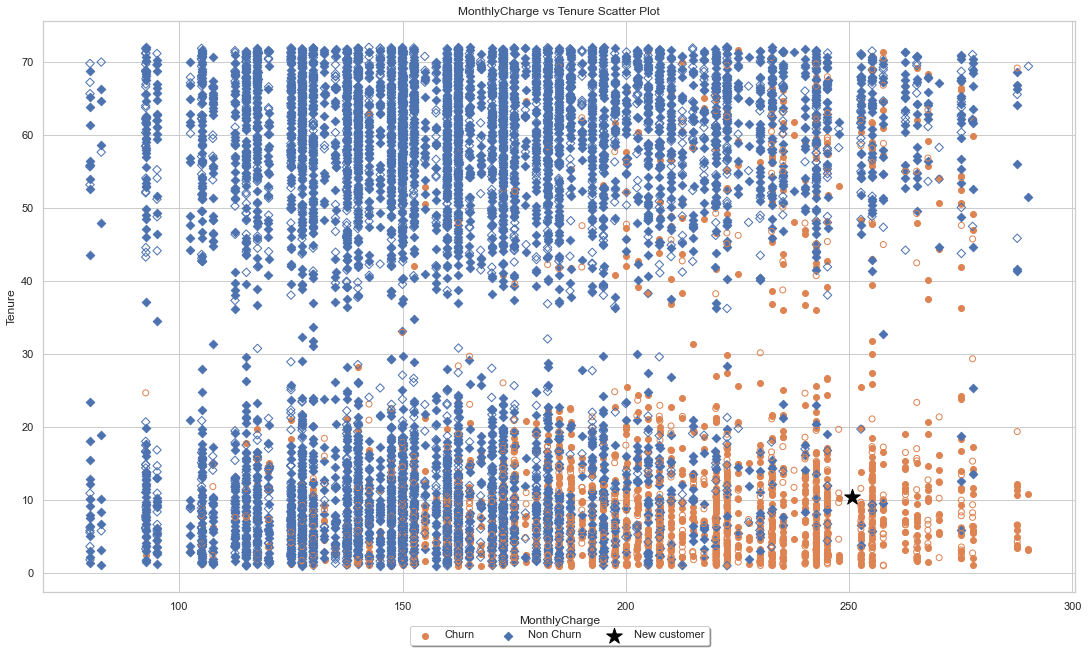

In [63]:
## scatter plot
def plotDataset(ax, data, showLabel=True, **kwargs):
    subset = data.loc[data['Churn']==True]
    ax.scatter(subset.MonthlyCharge, subset.Tenure, marker='o',
              label='Churn' if showLabel else None, color='C1', **kwargs)
    subset = data.loc[data['Churn']==False]
    ax.scatter(subset.MonthlyCharge, subset.Tenure, marker='D',
              label='Non Churn' if showLabel else None, color='C0', **kwargs)
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
plotDataset(ax, X_train.join(y_train))
plotDataset(ax, X_test.join(y_test), showLabel=False, facecolors='none')
ax.scatter(new.MonthlyCharge, new.Tenure, marker='*',
          label='New customer', color='black', s=270)
plt.title('MonthlyCharge vs Tenure Scatter Plot')
plt.xlabel('MonthlyCharge')
plt.ylabel('Tenure')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)
fig.savefig('d209_fig_4_1_monthlycharge_vs_tenure_scatter.png', dpi=200)
plt.show()

<div class="impact" data-hdr="FIGURE 4.1">SCATTER PLOT OF MONTHLYCHARGE VS TENURE FOR TRAINING SET (SOLID MARKERS) AND TEST SET (HOLLOW MARKERS) AND THE NEW CUSTOMER (STAR MARKER) TO BE CLASSIFIED. From intial observation, it looks like the new customer should be classified as "Churn = True". The prediction is calculated below:</div>

In [64]:
X_train.join(y_train)

,Tenure,MonthlyCharge,Churn
4847,9.525,92.488,False
9992,56.472,137.439,False
4621,2.612,124.964,False
5774,58.787,139.983,False
9294,64.116,255.120,False
...,...,...,...
5876,61.002,229.993,False
866,5.541,242.614,True
7696,44.605,270.160,False
74,2.379,214.966,True


In [65]:
stop

NameError: name 'stop' is not defined

<div class="impact" data-hdr="Standardize Data">Standardize training and test data as well as the new customer using sklearn scaler transformation. The normalized data will be used to make final predictions.</div>

In [ ]:
# feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train) # no longer dataframe... lose index...
X_test = scaler.transform(X_test)
new_norm = scaler.transform(new)

<div class="impact" data-hdr="Confusion and Classification Report">Using the sklearn KNeighborsClassifier, we can calculate the confusion and classification report to show expected model accuracy.</div>

<div class="impact" data-hdr="TABLE 4.x">CONFUSION MATRIX AND CLASSIFICATION REPORT</div>

In [ ]:
# confusion and classification report
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

<div class="impact" data-hdr="TABLE 4.x">RUNNING KNN FOR A SINGLE VALUE, K = 4</div>

In [66]:
# use NearestNeighbors from scikit-learn to compute knn
train = pd.DataFrame(X_train, columns=['Tenure','MonthlyCharge'])
train = train.merge(y_train, left_index=True, right_index=True)
from sklearn.neighbors import NearestNeighbors
knn = NearestNeighbors(n_neighbors=7)
knn.fit(train.iloc[:,0:2])
distances, indices = knn.kneighbors(new_norm)
train.iloc[indices[0],:]

NameError: name 'new_norm' is not defined

<div class="impact" data-hdr="Accuracy">Calculate accuracy and error rates for range of k-values.</div>

In [ ]:
# Calculating and plot error rate for range of k-values
error = []
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 30), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate by k-value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
fig.savefig('d209_fig_4_2_error_rates_by_k_value.png', dpi=200)
plt.show()

<div class="impact" data-hdr="FIGURE 4.2">ERROR RATES BY K-VALUE. Looks like the best performance we can expect is approx. 83-84%.</div>

<div class="impact" data-hdr="TABLE 4.x">CLASSIFYING NEW CUSTOMER USING SPECIFIC K-VALUE USING ORIGINAL FULL DATASET</div>

In [ ]:
type(X)

In [ ]:
type(y)

In [ ]:
y = pd.DataFrame(y, columns=['Churn'])
type(y)

In [ ]:
# retrain with full dataset
k=3
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=k)
classifier.fit(X, y)
print('Prediction for new customer: ',classifier.predict(new))
print('Distances: ',distances)
print('Indices: ',indices)
#print(churn_norm.iloc[indices[0],:])

<div class="part">Data Summary and Implications</div>

<h2 data-nbr="E1">Explain Accuracy</h2>

<div class="impact" data-hdr="Accuracy">For an example, with k=3, we found that the three (3) nearest neighbors to the new customer (with MonthlyCharge = $155.60 and Tenure = 12.4) are customers 1215, 370, and 2498. Since two (2) of them are False and one (1) of them are True, we can estimate for the new customer a probability of 2/3 = 0.667 of not churning (and a probability of 1/3 = 0.333 of churning).</div>

<h2 data-nbr="E4">Recommendations</h2>

<div class="impact" data-hdr="Recommendations">Customers will be less likely to churn if their <b>MonthlyCharge</b> is minimized and if the customer has any of the additionaly available services. Focus marketing efforts on which additional services are best for each customer, maybe bundle some of the services at a slightly reduced monthly payment.  Increase customers' awareness of the value of the additional services for what they are paying each month. Keeping their monthly payment low and increasing the number of extra services will minimize likelihood of churn, and provide company with increase in the customer lifetime revenue.</div>

<div class="part">Demonstration</div>

<h2 data-nbr="F">Provide Panopto Video</h2>

The Panopto video recording was created and here is the link: https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=a90e1811-2440-4e27-a081-adbb01855443

<h2 data-nbr="G">Provide Web Sources</h2>